
Mejor ruta encontrada:
D -> B -> C -> E -> A -> D
Tiempo total: 5.17 días
Costo total : $590


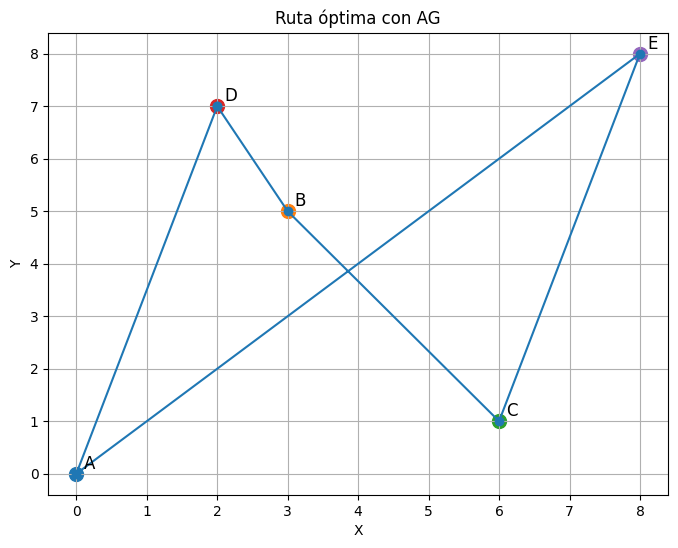

In [5]:

import random
import matplotlib.pyplot as plt

ciudades = ['A', 'B', 'C', 'D', 'E']

distancias = {
    ('A', 'B'): 300, ('A', 'C'): 400, ('A', 'D'): 250, ('A', 'E'): 500,
    ('B', 'A'): 300, ('B', 'C'): 150, ('B', 'D'): 200, ('B', 'E'): 600,
    ('C', 'A'): 400, ('C', 'B'): 150, ('C', 'D'): 350, ('C', 'E'): 450,
    ('D', 'A'): 250, ('D', 'B'): 200, ('D', 'C'): 350, ('D', 'E'): 700,
    ('E', 'A'): 500, ('E', 'B'): 600, ('E', 'C'): 450, ('E', 'D'): 700,
}
for c in ciudades:
    distancias[(c, c)] = 0

costos_transporte = {
    ('A', 'B'): 100, ('A', 'C'): 150, ('A', 'D'): 120, ('A', 'E'): 200,
    ('B', 'A'): 100, ('B', 'C'): 50,  ('B', 'D'): 70,  ('B', 'E'): 250,
    ('C', 'A'): 150, ('C', 'B'): 50,  ('C', 'D'): 100, ('C', 'E'): 150,
    ('D', 'A'): 120, ('D', 'B'): 70,  ('D', 'C'): 100, ('D', 'E'): 300,
    ('E', 'A'): 200, ('E', 'B'): 250, ('E', 'C'): 150, ('E', 'D'): 300,
}
for c in ciudades:
    costos_transporte[(c, c)] = 0

coordenadas = {
    'A': (0, 0), 'B': (3, 5), 'C': (6, 1), 'D': (2, 7), 'E': (8, 8),
}

TIEMPO_MAX      = 10
PRESUPUESTO_MAX = 5000
KM_POR_DIA      = 300
POBLACION       = 100
GENERACIONES    = 400
TASA_CRUCE      = 0.9
TASA_MUTACION   = 0.2
TORNEO_K        = 3

def tiempo_total(ruta):
    return sum(distancias[(ruta[i], ruta[(i+1)%len(ruta)])] / KM_POR_DIA
               for i in range(len(ruta)))

def costo_total(ruta):
    return sum(costos_transporte[(ruta[i], ruta[(i+1)%len(ruta)])]
               for i in range(len(ruta)))

def fitness(ruta):
    t = tiempo_total(ruta)
    c = costo_total(ruta)
    if t > TIEMPO_MAX or c > PRESUPUESTO_MAX:
        return 1e9
    return t + c/1000

def ruta_aleatoria():
    return random.sample(ciudades, len(ciudades))

def seleccion_torneo(poblacion):
    return min(random.sample(poblacion, TORNEO_K), key=fitness)

def cruce_ox(p1, p2):
    """Ordered Crossover (OX) que devuelve un hijo sin duplicados."""
    n = len(p1)
    a, b = sorted(random.sample(range(n), 2))
    hijo = [None]*n
    hijo[a:b] = p1[a:b]
    p2_iter = p2[b:] + p2[:b]
    idx = b
    for gen in p2_iter:
        if gen not in hijo:
            hijo[idx % n] = gen
            idx += 1
    return hijo

def mutacion_swap(ind):
    i, j = random.sample(range(len(ind)), 2)
    ind[i], ind[j] = ind[j], ind[i]

def reparar(ind):
    """Reparador: garantiza que el individuo sea una permutación válida."""
    faltantes = [c for c in ciudades if c not in ind]
    vistos = set()
    for i, gen in enumerate(ind):
        if gen in vistos:
            ind[i] = faltantes.pop(0)
        else:
            vistos.add(gen)
    return ind

def algoritmo_genetico():
    poblacion = [ruta_aleatoria() for _ in range(POBLACION)]
    mejor = min(poblacion, key=fitness)

    for _ in range(GENERACIONES):
        nueva = []
        while len(nueva) < POBLACION:
            p1, p2 = seleccion_torneo(poblacion), seleccion_torneo(poblacion)
            hijo = cruce_ox(p1, p2) if random.random() < TASA_CRUCE else p1[:]
            if random.random() < TASA_MUTACION:
                mutacion_swap(hijo)
            hijo = reparar(hijo)
            nueva.append(hijo)
        poblacion = nueva
        cand = min(poblacion, key=fitness)
        if fitness(cand) < fitness(mejor):
            mejor = cand
    return mejor

if __name__ == "__main__":
    mejor_ruta = algoritmo_genetico()
    t = tiempo_total(mejor_ruta)
    c = costo_total(mejor_ruta)

    print("\nMejor ruta encontrada:")
    print(" -> ".join(mejor_ruta + [mejor_ruta[0]]))
    print(f"Tiempo total: {t:.2f} días")
    print(f"Costo total : ${c:.0f}")

    xs = [coordenadas[c][0] for c in mejor_ruta] + [coordenadas[mejor_ruta[0]][0]]
    ys = [coordenadas[c][1] for c in mejor_ruta] + [coordenadas[mejor_ruta[0]][1]]

    plt.figure(figsize=(8, 6))
    for ciudad, (x, y) in coordenadas.items():
        plt.scatter(x, y, s=100)
        plt.text(x+0.1, y+0.1, ciudad, fontsize=12)
    plt.plot(xs, ys, '-o')
    plt.title("Ruta óptima con AG")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()
